In [59]:
import sys
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression                                        #1
from sklearn.neighbors import KNeighborsClassifier                                         #2
from sklearn.tree import DecisionTreeClassifier                                            #3
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis                       #4
from sklearn.naive_bayes import GaussianNB                                                 #5
from sklearn.svm import SVC                                                                #6
from sklearn.ensemble import VotingClassifier                                              

In [60]:
#versions for
print("Pandas     :{}".format(sys.version))
print("Numpy      :{}".format(sys.version))
print("Scipy      :{}".format(sys.version))
print("Matplotlib :{}".format(sys.version))

Pandas     :3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Numpy      :3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Scipy      :3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Matplotlib :3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


In [61]:
#loading the data
from sklearn.datasets import load_iris
iris=load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [62]:
print("Target names are :\n{}".format(iris['target_names']))  
#names of the flower species in which are data needs to be classified

Target names are :
['setosa' 'versicolor' 'virginica']


In [63]:
print("The feature names are :\n{}".format(iris['feature_names']))

The feature names are :
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [64]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [65]:
print(iris['data'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [66]:
print(iris['data'].shape)

(150, 4)


In [67]:
iris_dataset=pd.DataFrame(iris['data'],columns=iris['feature_names'])

In [68]:
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


NameError: name 'pyplot' is not defined

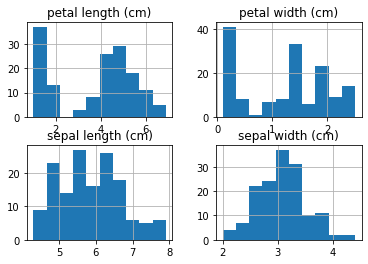

In [69]:
iris_dataset.hist()
pyplot.show()

In [ ]:
#multivariate plots
scatter_matrix(iris_dataset)
pyplot.show()

In [ ]:
#splitting dataset 80 to train and test on 20
X_train,X_test,y_train,y_test=train_test_split(iris['data'],iris['target'],test_size=0.2,random_state=1)

In [70]:
#logistic Regression
#lineardiscriminant analysis
#KNN
# Classification and Regression Trees
#NB
#support Vector Machines

In [74]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

In [77]:
#evaluate each of them
results=[]
names=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=10,random_state=1)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name,cv_results.mean(),cv_results.std()))

LR: 0.950000 (0.055277)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


C:\Users\Shivansh Sarbhai\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Shivansh Sarbhai\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Shivansh Sarbhai\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Shivansh Sarbhai\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a ran

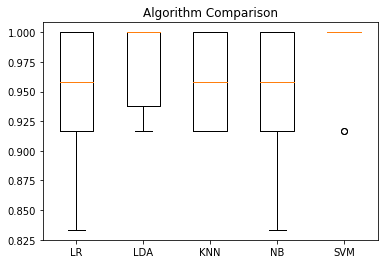

In [80]:
#compare our models 
plt.boxplot(results,labels=names)
plt.title("Algorithm Comparison")
plt.show()

In [90]:
model=SVC(gamma='auto')
model.fit(X_train,y_train)
pred=model.predict(X_test)
print("Accuracy score is {} ".format(np.mean(pred==y_test)))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score is 0.9666666666666667 
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

